# Análise, limpeza e geração de nuvens com dataframe 'tweets'

**Importação das Ferramentas: bibliotecas e pacotes**


In [ ]:
import numpy as np                                              # Funções matemáticas (matrizes, vetores, arrays)
import pandas as pd                                             # Manipulação, organização e rotulagem de dados (estruturados, séries temporais)
import nltk                                                     # Natural Language Toolkit: Classificar, marcar, filtrar termos pela base, analisar a sintaxe e o sentido semântico de palavras.
import matplotlib.pyplot as plt                                 # Visualização de dados
import seaborn as sns                                           # Estatística e visualizações

# Scikit-Learn (AM): classificação, clusterização e regressão

from sklearn.model_selection import train_test_split            # Para divisão do dataset de treinamento/teste
from sklearn.feature_extraction.text import CountVectorizer     # Vetorização dos dados de texto e transformação em matriz de frequência
from sklearn.naive_bayes import MultinomialNB                   # Classificador Naive Bayes de texto 
from sklearn.model_selection import cross_val_predict           # validação cruzada: estimar o quão preciso é o modelo na prática (desempenho para um novo conjunto de dados)
from sklearn.metrics import confusion_matrix                    # Gerar matriz de valores reais x valores preditos pelo classificador
from sklearn.metrics import accuracy_score                      # Média global do acerto do modelo ao classificar as classes
from sklearn import metrics                                     # Métricas de validação: classification_report (recall, f1-score, precision)
from wordcloud import WordCloud, STOPWORDS                      # Visualização de dados: Gerar nuvens de palavras  // Palavra


%matplotlib inline

Carregar dataframe 'tweets' com valores da planilha de Tweets

In [ ]:
tweets = pd.read_csv('Tweets.csv')
tweets.head(100)

,Data,Polaridade,Paul Ekman,Tweets Limpos
0,2/4/2021,neutro,neutro,ATENÃÃO afeito Ã febre BBB21 abro exceÃÃo com...
1,2/4/2021,neutro,neutro,ta febre vai sim
2,2/4/2021,neutro,neutro,395 febre tava vendo gnomo
3,2/4/2021,negativo,tristeza,febre lucas n abaixa quer comer surtando preo...
4,2/4/2021,negativo,tristeza,acordei dor garganta pouco febre PAZ SABE
...,...,...,...,...
95,2/5/2021,neutro,neutro,acordei febre dor
96,2/5/2021,neutro,neutro,Acordei febre hj nada bem aff
97,2/5/2021,negativo,tristeza,Acordei febre Ãdio
98,2/5/2021,negativo,tristeza,ai desculpa gnt acordei sentindo tao mal sint...


In [ ]:
tweets.shape                 # Número de linhas e colunas do dataframe

(4493, 4)

In [ ]:
tweets.columns               # Nome das colunas do dataframe

Index(['Data', 'Polaridade', 'Paul Ekman', 'Tweets Limpos'], dtype='object')

Contagem e agrupamento dos valores da coluna com a classificação de 'Polaridade'

In [ ]:
tweets.groupby(by='Polaridade').size()

Polaridade
negativo    1351
neutro      2941
positivo     201
dtype: int64

Contagem e agrupamento dos valores da coluna com a classificação de 'Paul Ekman'

In [ ]:
tweets.groupby(by='Paul Ekman').size()

Paul Ekman
felicidade     144
medo           241
neutro        2842
nojo            11
raiva          602
surpresa       108
tristeza       545
dtype: int64

Repare que, tanto na classificação de 'Polaridade', quanto na de 'Paul Ekman', o valor 'neutro' se sobressai na contagem. Isso causa uma desproporção na análise dos dados. 


**Na classificação de 'Paul Ekman', 'neutro' também correspondeu a todos os demais sentimentos que apareceram nos tweets, mas que não coincidiam com as seis emoções do psicólogo.**

**Devido a isso, todos os tweets classificados como 'neutro' na classificação de 'Paul Ekman' serão removidos do dataframe para não tendenciarem equivocadamente a análise das métricas.**

In [ ]:
tweets.drop(tweets.loc[tweets['Paul Ekman'] == 'neutro'].index, inplace=True )    

Números do dataframe após a remoção dos tweets 'neutro' na classificação de 'Paul Ekman'

In [ ]:
tweets.shape                                  # Número de colunas e linhas

(1651, 4)

In [ ]:
tweets.groupby(by='Polaridade').size()        # Classificação de Polaridade (938, 628, 82)

Polaridade
negativo    938
neutro      628
positivo     85
dtype: int64

In [ ]:
tweets.groupby(by='Paul Ekman').size()        # Checar valores de Paul Ekman (144, 241, 11, 602, 108, 545)

Paul Ekman
felicidade    144
medo          241
nojo           11
raiva         602
surpresa      108
tristeza      545
dtype: int64

Gráfico de barras: **análise de polaridade**

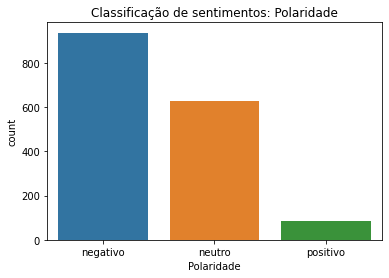

In [ ]:
graf_barra_pol = sns.countplot(x = 'Polaridade', 
              data = tweets,
              order = tweets['Polaridade'].value_counts().index)


graf_barra_pol.set_title('Classificação de sentimentos: Polaridade')

plt.show(graf_barra_pol)

Gráfico de barras: **análise de Paul Ekman**

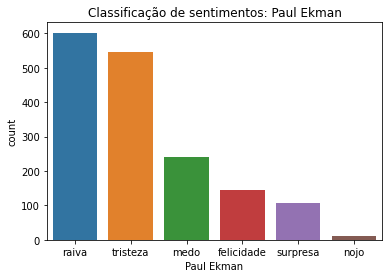

In [ ]:
graf_barra_paul = sns.countplot(x = 'Paul Ekman', 
              data = tweets,
              order = tweets['Paul Ekman'].value_counts().index)

graf_barra_paul.set_title('Classificação de sentimentos: Paul Ekman')

plt.show(graf_barra_paul)

**Separação de todos os valores da classificação sentimental em variáveis próprias para gerar uma nuvem de palavra correspondente à cada valor** 

In [ ]:
tweets_pos = tweets[tweets['Polaridade'] == 'positivo']
tweets_neg = tweets[tweets['Polaridade'] == 'negativo']
tweets_neu = tweets[tweets['Polaridade'] == 'neutro']

In [ ]:
tweets_raiva = tweets[tweets['Paul Ekman'] == 'raiva']
tweets_trist = tweets[tweets['Paul Ekman'] == 'tristeza']
tweets_medo = tweets[tweets['Paul Ekman'] == 'medo']
tweets_felic = tweets[tweets['Paul Ekman'] == 'felicidade']
tweets_surpr = tweets[tweets['Paul Ekman'] == 'surpresa']
tweets_nojo = tweets[tweets['Paul Ekman'] == 'nojo']

Remoção da coluna 'Data' do dataframe

In [ ]:
tweets = tweets.drop(['Data'], axis = 1)  

In [ ]:
tweets

,Polaridade,Paul Ekman,Tweets Limpos
3,negativo,tristeza,febre lucas abaixa quer comer surtando preocup...
4,negativo,tristeza,acordei garganta pouco febre SABE
7,negativo,tristeza,Super daora passar manhÃ chorando falta ainda ...
8,negativo,tristeza,dito publicamente governador quis fazer inclus...
10,negativo,tristeza,vezes duvido capacidade pessoas entenderem doe...
...,...,...,...
4481,negativo,raiva,conseguindo levantar cama queimando febre odio...
4482,negativo,tristeza,febre fudida
4484,neutro,tristeza,falarser filhos imunidade baixa foda qualquer ...
4491,negativo,raiva,colega trabalho loja bado conjuntiviteapareceu...


Exclusão de todas as palavras com menos de 3 caracteres nos tweets

In [ ]:
tweets['Tweets Limpos'] = tweets['Tweets Limpos'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
tweets

,Polaridade,Paul Ekman,Tweets Limpos
3,negativo,tristeza,febre lucas abaixa quer comer surtando preocup...
4,negativo,tristeza,acordei garganta pouco febre SABE
7,negativo,tristeza,Super daora passar manhÃ chorando falta ainda ...
8,negativo,tristeza,dito publicamente governador quis fazer inclus...
10,negativo,tristeza,vezes duvido capacidade pessoas entenderem doe...
...,...,...,...
4481,negativo,raiva,conseguindo levantar cama queimando febre odio...
4482,negativo,tristeza,febre fudida
4484,neutro,tristeza,falarser filhos imunidade baixa foda qualquer ...
4491,negativo,raiva,colega trabalho loja bado conjuntiviteapareceu...


Criação de lista com algumas stopwords que não foram retiradas na fase de pré-processamento da base.

Função para plotar nuvem de palavras

In [ ]:
def print_wordcloud(dados, background_cor):
    words = ' '.join(dados)
    wordcloud = WordCloud(background_color=background_cor,
                          width=2000,
                          height=1000
                          ).generate(words)
    plt.figure(1, figsize=(11, 11))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Nuvem de palavras com termos que mais aparecerem na análise de todos os tweets

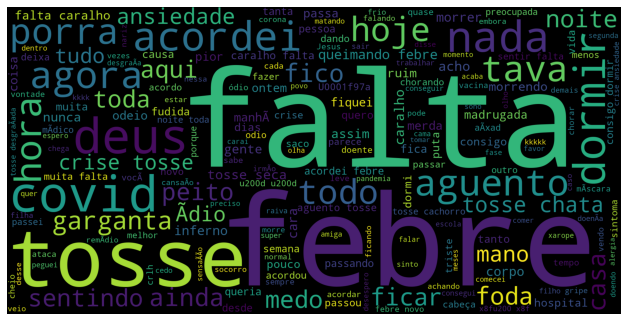

In [ ]:
print_wordcloud(tweets['Tweets Limpos'], 'black')

Nuvem de palavras: tweets positivos

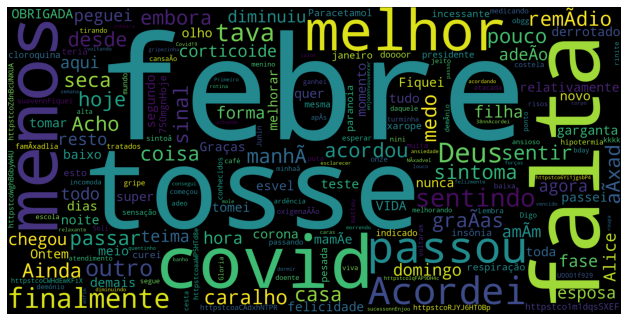

In [ ]:
print_wordcloud(tweets_pos['Tweets Limpos'], 'black')

Nuvem de palavras: tweets negativos

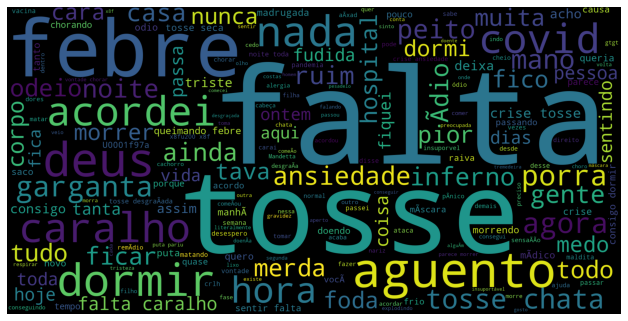

In [ ]:
print_wordcloud(tweets_neg['Tweets Limpos'], 'black')

Nuvem de palavras: tweets neutros

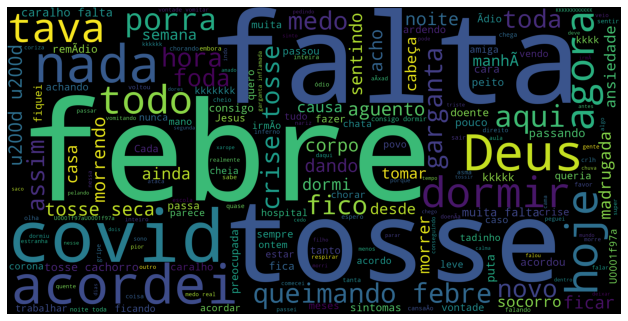

In [ ]:
print_wordcloud(tweets_neu['Tweets Limpos'], 'black')

Nuvem de palavras: raiva

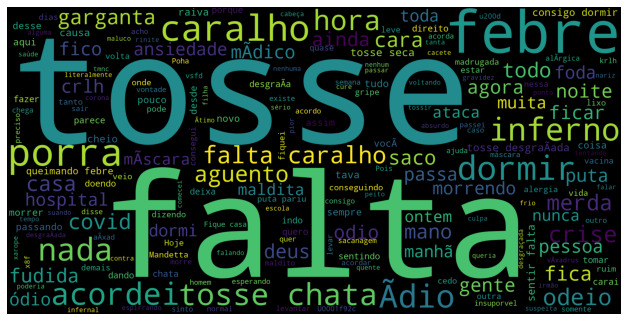

In [ ]:
print_wordcloud(tweets_raiva['Tweets Limpos'], 'black')

Nuvem de palavras: tristeza

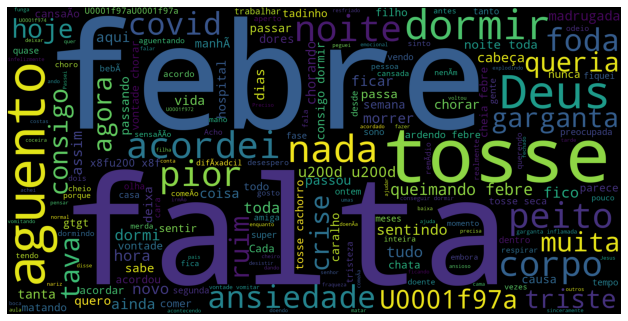

In [ ]:
print_wordcloud(tweets_trist['Tweets Limpos'], 'black')

Nuvem de palavras: medo

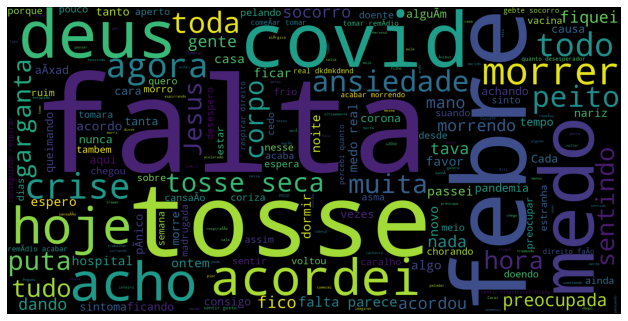

In [ ]:
print_wordcloud(tweets_medo['Tweets Limpos'], 'black')

Nuvem de palavras: felicidade

In [ ]:
print_wordcloud(tweets_felic['Tweets Limpos'], 'black')

Nuvem de palavras: surpresa

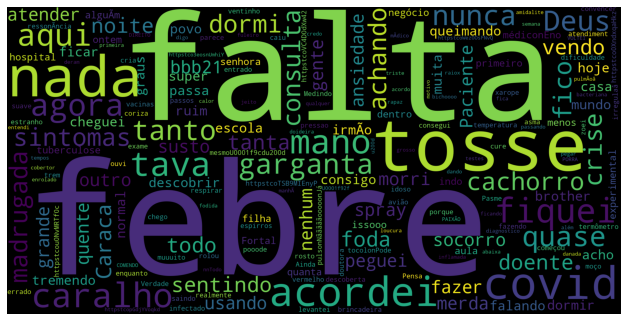

In [ ]:
print_wordcloud(tweets_surpr['Tweets Limpos'], 'black')

Nuvem de palavras: nojo

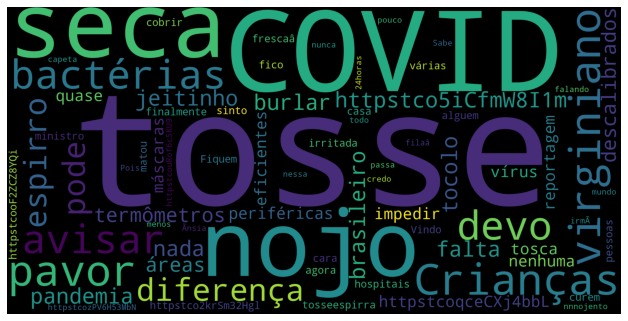

In [ ]:
print_wordcloud(tweets_nojo['Tweets Limpos'], 'black')

Gerar planilhas separadas para o treinamento dos classificadores de Polaridade e dos sentimentos de Paul Ekman

In [ ]:
# Criando planilhas separadas para as classificações de de Ekman e Polaridade 

# tweets = tweets.drop(['Paul Ekman'], axis = 1)                         # Ou Polaridade

# tweets_polar = tweets.to_csv('Tweets_Polaridade.csv', index = False)   # Ou Paul Ekman

# OBSERVAÇÃO: rodei planilhas no google planilhas e limpei os '[]', ',' e ''

In [ ]:
tweets

,Polaridade,Paul Ekman,Tweets Limpos
3,negativo,tristeza,febre lucas abaixa quer comer surtando preocup...
4,negativo,tristeza,acordei garganta pouco febre SABE
7,negativo,tristeza,Super daora passar manhÃ chorando falta ainda ...
8,negativo,tristeza,dito publicamente governador quis fazer inclus...
10,negativo,tristeza,vezes duvido capacidade pessoas entenderem doe...
...,...,...,...
4481,negativo,raiva,conseguindo levantar cama queimando febre odio...
4482,negativo,tristeza,febre fudida
4484,neutro,tristeza,falarser filhos imunidade baixa foda qualquer ...
4491,negativo,raiva,colega trabalho loja bado conjuntiviteapareceu...


**ANÁLISE DE SENTIMENTOS: Polaridade**

In [589]:
tweets_polar = pd.read_csv('Tweets_Polaridade.csv')

Guardando conteúdo da polarização e dos textos dos tweets nas variáveis 'tweets_texto' e 'polaridade' 

In [590]:
tweets_texto = tweets_polar['Tweets Limpos'].values
polaridade = tweets_polar['Polaridade'].values

**Construção da Bag Of Words e do Modelo de Classificação**

BOW: Dicionário em que cada palavra é associada à frequência dela dentro de um corpus (aqui é a base de dados inteira).

In [591]:
bow_vetorizador = CountVectorizer(max_features=1000)                  # Cada linha na matrix contém a frequência de tokens(palavras) no documento 
bow_frequencia_tweets = bow_vetorizador.fit_transform(tweets_texto)   # Tokenização e construção do vocabulário // matriz com dados já vetorizados
                                                                    

bow_frequencia_tweets.shape                                                                     

(1651, 1000)

Separação das bases de treino e teste

In [592]:
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_frequencia_tweets, polaridade, test_size=0.25)

Número de tweets separados em treino e teste



In [593]:
print("X_treino_shape : ",X_treino.shape)
print("X_teste_shape : ",X_teste.shape)
print("y_treino_shape : ",y_treino.shape)
print("y_teste_shape : ",y_teste.shape)

X_treino_shape :  (1238, 1000)
X_teste_shape :  (413, 1000)
y_treino_shape :  (1238,)
y_teste_shape :  (413,)


**Multinomial: classificador Naive Bayes**

Separação do modelo de preditores

In [594]:
modelo_NB = MultinomialNB().fit(X_treino, y_treino) 
predito_NB = modelo_NB.predict(X_teste)

Matrix de confusão

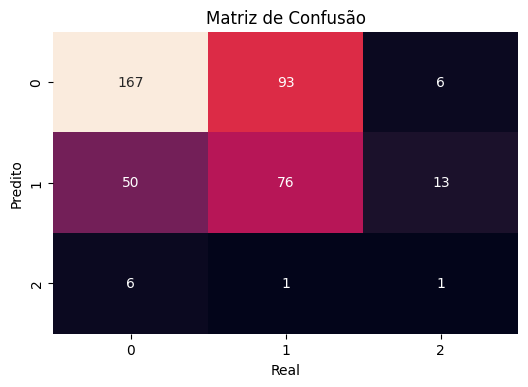

In [595]:
plt.figure(dpi=100)
mat = confusion_matrix(y_teste, predito_NB)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Matriz de Confusão')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.savefig("matriz_confusao_polaridade.png")
plt.show()

Acurácia

In [596]:
score_naive = accuracy_score(predito_NB, y_teste)
print("Acurácia Naive-bayes: ", score_naive)

Acurácia Naive-bayes:  0.5907990314769975


**Avaliação do Modelo Construído**

Validação cruzada

In [597]:
resultados = cross_val_predict(modelo_NB, bow_frequencia_tweets, polaridade, cv=15)
resultados

array(['neutro', 'neutro', 'neutro', ..., 'negativo', 'negativo',
       'neutro'], dtype='<U8')

Acurácia após validação cruzada

In [598]:
metrics.accuracy_score(polaridade,resultados)

0.5911568746214415

Avaliação do Modelo Construído: Precision, Recall, F1-score, Support

In [599]:
print (metrics.classification_report(polaridade, resultados))

              precision    recall  f1-score   support

    negativo       0.65      0.73      0.69       938
      neutro       0.50      0.45      0.47       628
    positivo       0.29      0.12      0.17        85

    accuracy                           0.59      1651
   macro avg       0.48      0.43      0.44      1651
weighted avg       0.57      0.59      0.58      1651



Relação: preditos x valores reais

In [600]:
print(pd.crosstab(polaridade, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   negativo  neutro  positivo   All
Real                                      
negativo       684     235        19   938
neutro         341     282         5   628
positivo        32      43        10    85
All           1057     560        34  1651


**ANÁLISE DE SENTIMENTOS: Paul Ekman**

In [601]:
tweets_paul = pd.read_csv('Tweets_PaulEkman.csv')

Guardando conteúdo da polarização e dos textos dos tweets nas variáveis  'tweets_texto' e 'Paul Ekman'

In [602]:
tweets_texto = tweets_paul['Tweets Limpos'].values
classif_ekman = tweets_paul['Paul Ekman'].values

In [603]:
bow2_vetorizador = CountVectorizer(max_features=1000)                      # Cada linha na matrix M contém a frequência de tokens(palavras) no documento D(i) 
bow2_frequencia_tweets = vetorizador.fit_transform(tweets_texto)           # tokenização e construção do vocabulário // matriz com dados já vetorizados
                                                                      
bow2_frequencia_tweets.shape                                                                     

(1651, 1000)

Separação das bases de treino e teste

In [604]:
X_treino, X_teste, y_treino, y_teste = train_test_split(bow2_frequencia_tweets, classif_ekman, test_size=0.3)

Número de tweets separados em treino e teste

In [605]:
print("X_treino_shape : ",X_treino.shape)
print("X_teste_shape : ",X_teste.shape)
print("y_treino_shape : ",y_treino.shape)
print("y_teste_shape : ",y_teste.shape)

X_treino_shape :  (1155, 1000)
X_teste_shape :  (496, 1000)
y_treino_shape :  (1155,)
y_teste_shape :  (496,)


**Multinomial: classificador Naive Bayes**

Separação do modelo de preditores

In [606]:
modelo_NB = MultinomialNB().fit(X_treino, y_treino) 
predito_NB = modelo_NB.predict(X_teste)

Matriz de confusão

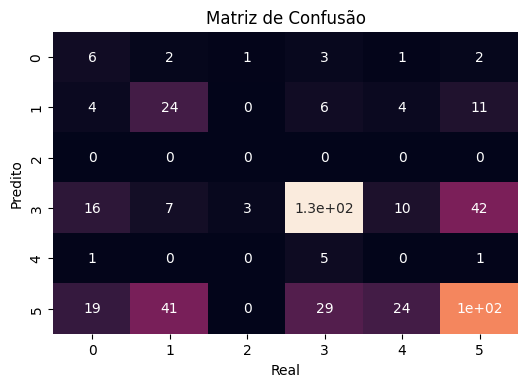

In [607]:
plt.figure(dpi=100)
cm = confusion_matrix(y_teste, predito_NB)
sns.heatmap(cm.T, annot=True, cbar=False)

plt.title('Matriz de Confusão')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.savefig("matriz_confusao_paulEkman.png")
plt.show()

Acurácia

In [608]:
score_naive = accuracy_score(predito_NB, y_teste)
print("Acurácia Naive-bayes: ", score_naive)

Acurácia Naive-bayes:  0.532258064516129


**Avaliação do Modelo Construído**

Validação cruzada

In [609]:
resultados = cross_val_predict(modelo_NB, bow2_frequencia_tweets, classif_ekman, cv=15)
resultados

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=15.
  UserWarning,


array(['medo', 'tristeza', 'tristeza', ..., 'tristeza', 'raiva', 'raiva'],
      dtype='<U10')

Acurácia após validação cruzada

In [610]:
metrics.accuracy_score(classif_ekman,resultados)

0.5529981829194428

Precision, Recall, F1-score, Support

In [611]:
print (metrics.classification_report(classif_ekman, resultados))

              precision    recall  f1-score   support

  felicidade       0.43      0.22      0.29       144
        medo       0.48      0.33      0.39       241
        nojo       0.00      0.00      0.00        11
       raiva       0.62      0.73      0.67       602
    surpresa       0.18      0.05      0.07       108
    tristeza       0.52      0.66      0.58       545

    accuracy                           0.55      1651
   macro avg       0.37      0.33      0.33      1651
weighted avg       0.52      0.55      0.53      1651



Relação: preditos x valores reais

In [612]:
print(pd.crosstab(classif_ekman, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     felicidade  medo  nojo  raiva  surpresa  tristeza   All
Real                                                               
felicidade          31    14     0     44         5        50   144
medo                 7    79     0     48         3       104   241
nojo                 1     2     0      7         0         1    11
raiva               14    23     1    440         7       117   602
surpresa             9     8     0     33         5        53   108
tristeza            10    37     0    132         8       358   545
All                 72   163     1    704        28       683  1651
